### Import image data and explore

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [42]:


# Processing parameters 
IMAGE_SIZE=256
BATCH_SIZE=32
SEED_NUM=78
TRAIN_SPLIT=0.2
data_dir = '00_data/raw'



# Use it with image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Gets labels from folder names
    label_mode='categorical',  # or 'int' for integer labels
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=SEED_NUM,
    validation_split=TRAIN_SPLIT,
    subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True,
    seed=SEED_NUM,
    validation_split=TRAIN_SPLIT,
    subset='validation'
)

class_names=train_ds.class_names

Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

### Potato classification by diseas type:

In [43]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

### Image files of healthy and diseased potato leaves

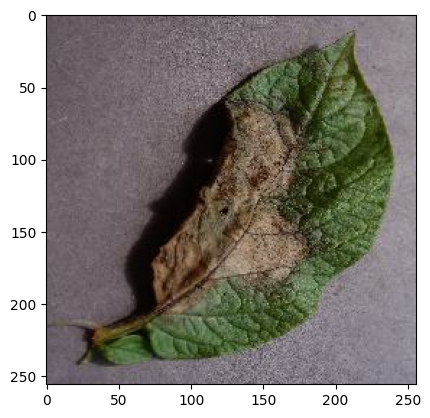

In [36]:
##

for image_batch, label_batch in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))


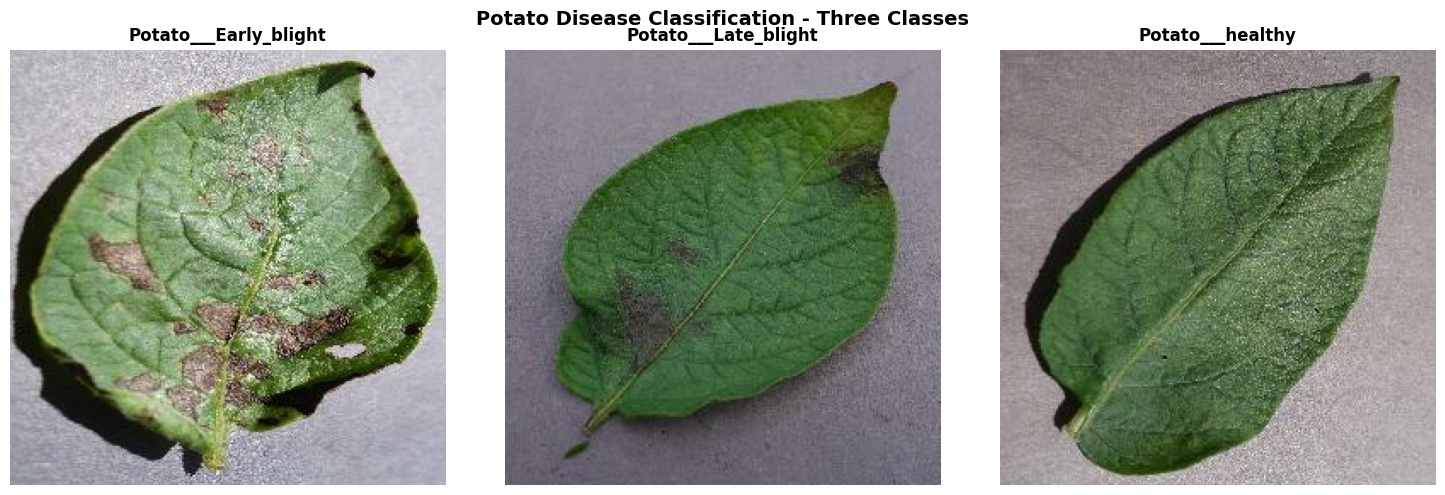

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with 3 columns (one per class)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Get one batch
for images, labels in train_ds.take(1):
    # Find one example of each class
    class_indices = labels.numpy().argmax(axis=1)
    
    for class_idx, class_name in enumerate(class_names):
        # Find first image of this class
        mask = class_indices == class_idx
        if mask.any():
            img_idx = np.where(mask)[0][0]
            
            # Plot
            axes[class_idx].imshow(images[img_idx].numpy().astype("uint8"))
            axes[class_idx].set_title(f"{class_name}", fontsize=12, fontweight='bold')
            axes[class_idx].axis('off')

plt.suptitle("Potato Disease Classification - Three Classes", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

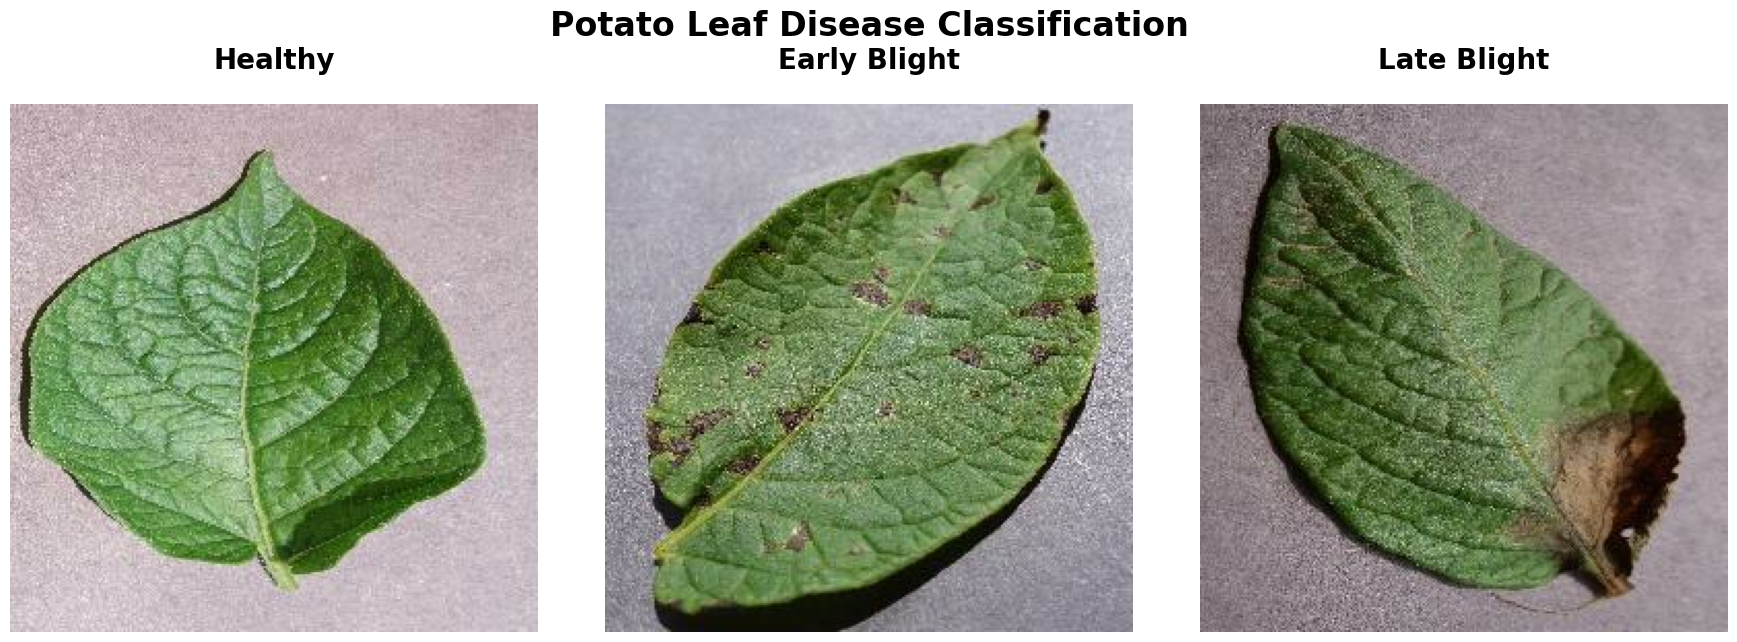

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define order and clean titles
order = ['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight']
titles = ['Healthy', 'Early Blight', 'Late Blight']

# Collect examples
examples = {}
for images, labels in train_ds.take(20):
    class_indices = labels.numpy().argmax(axis=1)
    for class_idx, class_name in enumerate(class_names):
        if class_name not in examples:
            mask = class_indices == class_idx
            if mask.any():
                examples[class_name] = images[img_idx := np.where(mask)[0][0]].numpy().astype("uint8")
    if len(examples) == 3:
        break

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6.5))

# Clear, prominent main title
fig.suptitle('Potato Leaf Disease Classification', 
            fontsize=24, 
            fontweight='bold', 
            y=0.98,
            family='sans-serif')

# Plot each class in order
for idx, (class_name, title) in enumerate(zip(order, titles)):
    if class_name in examples:
        # Display image
        axes[idx].imshow(examples[class_name])
        
        # Centered title above each image
        axes[idx].set_title(title, 
                          fontsize=20, 
                          fontweight='bold',
                          pad=25,
                          family='sans-serif')
        
        # Remove axes
        axes[idx].axis('off')

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [46]:
from pathlib import Path

# Create directory
docs_dir = Path('../docs/images')
docs_dir.mkdir(parents=True, exist_ok=True)

# Save the figure
plt.savefig(docs_dir / 'disease_comparison.png', 
           dpi=300, 
           bbox_inches='tight',
           facecolor='white',
           edgecolor='none')

print(f"✅ Saved to: {docs_dir / 'disease_comparison.png'}")

✅ Saved to: ../docs/images/disease_comparison.png


<Figure size 640x480 with 0 Axes>